In [ ]:
# This is an example GPT style decoder only transformer model and example dataset
# This an example of the use of the icanswim/cosmosis repo for data science and 
# machine learning projects

In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../')

from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

from cosmosis.dataset import AsTensor
from cosmosis.learning import Learn, Selector, Metrics
from cosmosis.model import GPT

from dataset import TinyShakes

In [2]:
# explore the ds

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'd_seq': 10,
            'n': 5}

ts = TinyShakes(**ds_param)

print(ts[0])
print(ts[0]['tokens'].shape, ts[0]['tokens'].dtype)
print(ts[0]['y'].shape, ts[0]['y'].dtype)
print('decoded tokens: ', ts.encoding.decode(ts[0]['tokens'].tolist()))
print('decoded y: ', ts.encoding.decode(ts[0]['y'].tolist()))


tinyshakes.txt loaded from saved file in ../gpt/data/
tokens loaded from file ./data/tinyshakes_stripped_encoded.bin
len(self.ds_idx):  5
data.nbytes:  602664
CDataset created...
{'tokens': tensor([ 5962, 22307,    25,  7413,   356,  5120,   597,  2252,    11,  3285]), 'y': tensor([22307,    25,  7413,   356,  5120,   597,  2252,    11,  3285,   502]), 'position': tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}
torch.Size([10]) torch.int64
torch.Size([10]) torch.int64
decoded tokens:  First Citizen: Before we proceed any further, hear
decoded y:   Citizen: Before we proceed any further, hear me


In [3]:
# example using prompt for inference

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'prompt': 'First Citizen: Before we proceed any further, hear '}

prompt = TinyShakes(**ds_param)
print(prompt[0])
print(prompt[0]['tokens'].shape)
# y wont be used in inference but is generated automatically 
# as part of the reuse of the getitem machinery
print(prompt[0]['y'].shape) 
print('decoded tokens: ', prompt.encoding.decode(prompt[0]['tokens'].tolist()))
print('decoded y: ', prompt.encoding.decode(prompt[0]['y'].tolist()))

len(self.ds_idx):  1
data.nbytes:  22
CDataset created...
{'tokens': tensor([ 5962, 22307,    25,  7413,   356,  5120,   597,  2252,    11,  3285,
          220]), 'y': tensor([22307,    25,  7413,   356,  5120,   597,  2252,    11,  3285,   220]), 'position': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}
torch.Size([11])
torch.Size([10])
decoded tokens:  First Citizen: Before we proceed any further, hear 
decoded y:   Citizen: Before we proceed any further, hear 


In [4]:
# pass a single example from dataset to model to loss function
# (batch, d_seq, d_model)

d_seq = 3 # dimension sequence
d_vocab = 50304 # dimension vocabulary
d_vec = 4 # dimension embedding vector
d_model = 4 # dimension model input
assert d_model == d_vec

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'd_seq': d_seq,
            'prompt': 'All the worlds a stage and all the men and women merely'}

prompt = TinyShakes(**ds_param)
print('prompt[0]: ', prompt[0])
print('prompt[0][tokens].shape: ', prompt[0]['tokens'].shape, prompt[0]['tokens'].dtype)
print('prompt[0][y].shape: ', prompt[0]['y'].shape)
print('prompt[0][position].shape: ', prompt[0]['position'].shape)
print('decoded tokens: ', prompt.encoding.decode(prompt[0]['tokens'].tolist()))
print('decoded y tokens: ', prompt.encoding.decode(prompt[0]['y'].tolist()))

model_param = {'device': 'cpu',
               'd_model': d_model, # matches embedding dimension
               'd_vocab': d_vocab, 
               'n_head': 2, 
               'num_layers': 2,
               'd_seq': d_seq,
               'd_vec': d_vec,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               'y': (d_vocab, d_vec, None, True),
                               'position': (d_seq, d_vec, None, True)}} 

gpt = GPT(model_param)

data = prompt[0]
out = gpt(data)
print('output: ', out, out.shape, out.dtype)

prompt_tokens = data['tokens']
print('prompt_tokens: ', prompt_tokens, prompt_tokens.shape, prompt_tokens.dtype)

target_tokens = data['y']
print('target_tokens: ', target_tokens, target_tokens.shape, target_tokens.dtype)

generated_embeddings = out.squeeze()
print('generated_embeddings: ', generated_embeddings, generated_embeddings.shape, generated_embeddings.dtype)
print('decoded generated tokens: ', prompt.encoding.decode(generated_embeddings.argmax(dim=-1).tolist()))

cel_func = CrossEntropyLoss()
loss = cel_func(out, target_tokens)
print('loss: ', loss)


len(self.ds_idx):  1
data.nbytes:  24
CDataset created...
prompt[0]:  {'tokens': tensor([ 3237,   262, 11621,   257,  3800,   290,   477,   262,  1450,   290,
         1466,  6974]), 'y': tensor([  262, 11621,   257,  3800,   290,   477,   262,  1450,   290,  1466,
         6974]), 'position': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])}
prompt[0][tokens].shape:  torch.Size([12]) torch.int64
prompt[0][y].shape:  torch.Size([11])
prompt[0][position].shape:  torch.Size([12])
decoded tokens:  All the worlds a stage and all the men and women merely
decoded y tokens:   the worlds a stage and all the men and women merely
applying _init_weights...
GPT model loaded...


IndexError: index out of range in self

tinyshakes.txt loaded from saved file in ../gpt/data/
tokens loaded from file ./data/tinyshakes_stripped_encoded.bin
len(self.ds_idx):  1000
data.nbytes:  602664
CDataset created...
applying _init_weights...
GPT model loaded...
running model on gpu...

.....................

total elapsed time: 0:00:03.213742
epoch: 1
y_pred:   although straight nakedspect Sweetsticks Norfolk NameickenILusing BelieveTwo sleep incom manner prime wantingELLound almostVOL complain begg mark west young damned absence Conf sour tried destroy Shall wings Say victory countenance unjust kissery Shepherd noticeheadsTONilded knewe march
y:   art, Duke of York; Thy grandfather, Roger Mortimer, Earl of March: I am the son of Henry the Fifth, Who made the Dauphin and the French to stoop And seized upon their towns and provinces.  WARW
train loss: 0.21588170812243507, val loss: 0.2655376046895981
lr: 0.01

.....................

total elapsed time: 0:00:04.402797
epoch: 2
y_pred:  rieve malants osu cage washed doorw

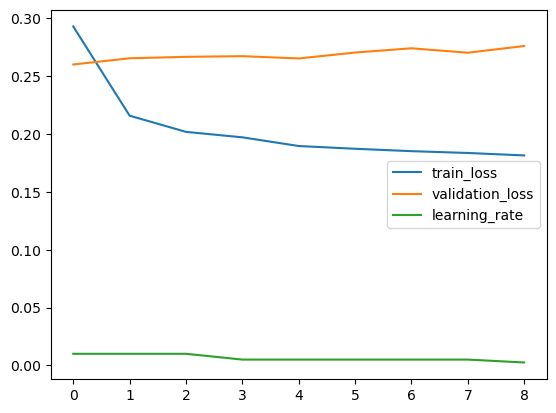

model: tinyshakes128 saved...


In [4]:
# put all together in a learner
# (batch, d_seq, d_model)

d_seq = 50 # dimension sequence
d_vocab = 50304 # dimension vocabulary
d_vec = 128 # dimension embedding vector
d_model = 128 # dimension model input
assert d_model == d_vec

ds_param = {'train_param': {'transforms': {'tokens': [AsTensor()],
                            'y': [AsTensor()],
                            'position': [AsTensor()]},
            'd_seq': d_seq,
            'n': 1000,
                           }}

model_param = {'d_model': d_model,
               'd_vocab': d_vocab, 
               'n_head': 8, 
               'num_layers': 6,
               'd_seq': d_seq,
               'd_vec': d_vec,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               'y': (d_vocab, d_vec, None, True),
                               'position': (d_seq, d_vec, None, True)}} 
                                       
metrics_param = {'metric_name': 'transformer',
                 'report_interval': 1,
                 'log_plot': False,
                 'min_lr': .0025} # break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([TinyShakes], 
              GPT,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=32, epochs=10, gpu=True, 
              save_model='tinyshakes128', load_model=None, target='y')

In [6]:
# inference
d_gen = 50 # dimension generate number of tokens
d_vocab = 50304 # dimension vocabulary
d_vec = 128 # dimension embedding vector
d_model = 128 # dimension model input
d_pos = 50 # size of position encoding vocab needs to be the larger of len(prompt) and d_gen 

assert d_model == d_vec


ds_param = {'train_param': {'transforms': {'tokens': [AsTensor()],
                            'y': [AsTensor()],
                            'position': [AsTensor()]},
            'prompt': 'You may partake of any thing we say \
We speak no treason man we say the king'}}

model_param = {'d_model': d_model,
               'd_vocab': d_vocab, 
               'n_head': 8, 
               'num_layers': 6,
               'd_gen': d_gen,
               'd_vec': d_vec,
               'temperature': 1,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               #'y': (d_vocab, d_vec, None, True),
                               'position': (d_pos, d_vec, None, True)}} 
                                       
metrics_param = {'metric_name': 'transformer'}                        
             
opt_param = {}

crit_param = {}

sample_param = {}

sched_param = {}

learn = Learn([TinyShakes], 
              GPT,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=None, 
              Scheduler=None, 
              Criterion=None, # no criterion implies inference
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=1, epochs=1, gpu=True, 
              load_model='tinyshakes128.pth', target=None)


len(self.ds_idx):  1
data.nbytes:  34
CDataset created...
applying _init_weights...
GPT model loaded...
model loaded from state_dict...
running model on gpu...

.....................

total learning time: 0:00:00.195910
predictions:  [[' livelyIO Illustrated bePE marks OFRingG-Gve, theumIII,KEef Synt Kurds Brunohill consumeino entersRainbas Outlook applesasingasingasing axle predicate publishing aval inhibitor Machina FALSE spreads NIasingerning apples sharasing']]
inference instance 2025-03-05 10:14:52.353723 complete and saved to csv...
